In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_excel('FEV-data-Excel.xlsx')
df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [26]:
#Task1(a)
filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]
filtered_df

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,408,760,disc (front + rear),4WD,80.0,414,...,2940.0,445.0,5,5,19,180,500.0,5.1,110,21.85
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,NaN,NaN,5,5,18,225,425.0,5.6,150,NaN
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,310,disc (front) + drum (rear),2WD (rear),58.0,425,...,2270.0,540.0,5,5,18,160,385.0,7.3,100,15.40


In [75]:
#Task 1(b)
grouped_by_make = filtered_df.groupby('Make')
grouped_by_make

In [57]:
#Task 1(c)
avg_battery_capacity = grouped_by_make['Battery capacity [kWh]'].mean()
avg_battery_capacity

Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64

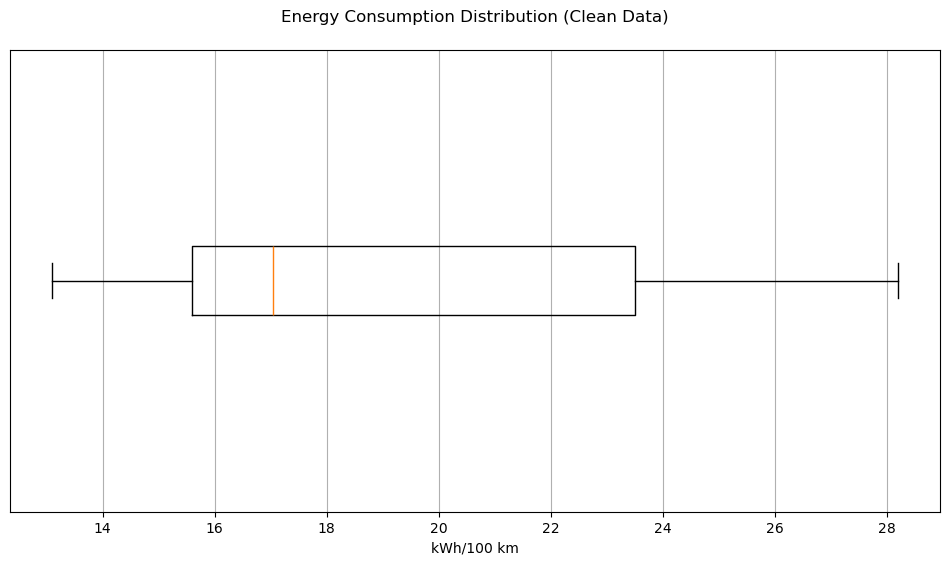

Total outliers found: 0


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_excel("FEV-data-Excel.xlsx")
column_name = 'Mean - Energy consumption [kWh/100 km]' 
if 'mean - Energy consumption [kWh/100 km]' in df.columns:  
    column_name = 'mean - Energy consumption [kWh/100 km]'
iqr_outliers = df[
    (df[column_name] < (df[column_name].quantile(0.25) - 1.5*(df[column_name].quantile(0.75)-df[column_name].quantile(0.25)))) | 
    (df[column_name] > (df[column_name].quantile(0.75) + 1.5*(df[column_name].quantile(0.75)-df[column_name].quantile(0.25))))
].dropna(subset=[column_name])

clean_df = df.dropna(subset=[column_name]).copy()
z_scores = np.abs(stats.zscore(clean_df[column_name]))
z_outliers = clean_df[z_scores > 3]

plt.figure(figsize=(12, 6))
plt.boxplot(clean_df[column_name], vert=False)
plt.title("Energy Consumption Distribution (Clean Data)", pad=20)
plt.xlabel("kWh/100 km")
plt.yticks([])
plt.grid(True)

for i, x in enumerate(z_outliers[column_name]):
    plt.plot(x, 1, 'ro', alpha=0.5)
    plt.text(x, 1.1, f"{x:.1f}", ha='center')

plt.show()
final_outliers = pd.concat([iqr_outliers, z_outliers]).drop_duplicates()
print(f"Total outliers found: {len(final_outliers)}")


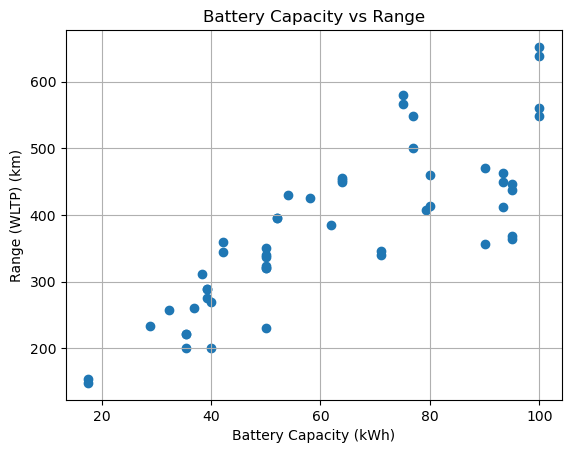

In [104]:
#Task 3
import matplotlib.pyplot as plt

plt.scatter(df['Battery capacity [kWh]'], df['Range (WLTP) [km]'])
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (WLTP) (km)')
plt.title('Battery Capacity vs Range')
plt.grid(True)
plt.show()

In [ ]:
""" 
Task 3 Insights :
This is being clear from the chart that the battery capacity is directly correalted by the Range of the EV but after 80 KWh Capacity 
the range is more or less stangnent in under 500 Kilometers.
"""

In [69]:
#Task 4
class EVRecommendation:
    def __init__(self, data):
        self.data = data

    def recommend(self, budget, min_range, min_battery):
        filtered = self.data[(self.data['Minimal price (gross) [PLN]'] <= budget) &
                             (self.data['Range (WLTP) [km]'] >= min_range) &
                             (self.data['Battery capacity [kWh]'] >= min_battery)]
        return filtered.sort_values('Minimal price (gross) [PLN]').head(3)

recommender = EVRecommendation(df)
recommender.recommend(300000, 350, 50)


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
9,Citroën ë-C4,Citroën,ë-C4,125000,136,260,disc (front + rear),2WD (front),50.0,350,...,2000.0,459.0,5,5,16,150,380.0,9.5,100,NaN
34,Renault Zoe R110,Renault,Zoe R110,135900,108,225,disc (front + rear),2WD (front),52.0,395,...,1988.0,425.0,5,5,15,135,338.0,11.4,50,16.5
35,Renault Zoe R135,Renault,Zoe R135,142900,135,245,disc (front + rear),2WD (front),52.0,395,...,1988.0,486.0,5,5,16,140,338.0,9.5,50,16.5


In [67]:
#Task 5
from scipy.stats import ttest_ind

tesla = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi = df[df['Make'] == 'Audi']['Engine power [KM]']

t_stat, p_value = ttest_ind(tesla, audi, equal_var=False)
print('t-statistic:', t_stat)
print('p-value:', p_value)



t-statistic: 1.7939951827297178
p-value: 0.10684105068839565


In [ ]:
"""
KEY INSIGHTS :
Based on a two-sample t-test (p = 0.1068 > 0.05), there is no significant difference in engine power between Tesla and Audi vehicles in the dataset. 
Although Tesla may appear to have slightly higher engine power on average,the difference is not statistically significant.
"""